# Laboratorio 1

Universidad Galileo
Algoritmos en la Ciencia de Datos

**Rodrigo Rafael Chang Papa**

**Carné: 19000625**

## Carga de librerías

In [4]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Funciones generales para evaluar polinomios

In [5]:
# Función para obtener una cadena de texto con la expresión matemática
# a ser evaluada por Python
def genFormula(equat):
    equat = equat.replace(' ', '')
    spliter = re.split("([\+|\-])", equat)
    #spliter = re.split("((\d*)(x)\^*\d*)+([\+|\-])*([\+|\-]\d*)", equat)
    #print(spliter)
    out = ""
    for w in spliter:
        try:
            if(('x' in w) and len(w) >= 2): #Extramos monomios.
                varPos = w.index('x')
                w = w[:varPos] + "*" +  w[varPos:]
                w = w.replace('^', '**')
                out = out +  '(' + w + ')'
            elif(('x' not in w)): #Extraemos numeros sin variable.
                out = out +  w       
        except:
            pass
    #print(out)
    return out

# Función para evaluar la cadena str_equ con el valor valX
def evaluate_Fx(str_equ, valX):
    strOut = genFormula(str_equ)
    #print(strOut)
    x = valX
    out = eval(strOut)
    return out

# Función para aproximar una derivada por diferencias finitas
def evaluate_derivate_fx(str_equ, x, h):
    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x + h)')
    strOut = "-4*(" + strOut + ")"
    out = eval(strOut)

    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x + 2*h)')
    out = out + eval(strOut)

    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x)')
    strOut = "3*(" + strOut + ")"
    out = out + eval(strOut)

    out = -out/(2*h)

    return out

## Algoritmo de Newton


In [6]:
# Método de Newton con punto inicial x0 para resolver 
# f(x)=genFormula(strIn) con precisión eps
def newtonSolverX(x0, strIn, eps):
    xn = x0
    error = 1e10
    
    # Listas para guardar iteradores
    arrayIters = []
    arrayF_x = []
    arrayf_x = []
    arrayXn = []
    arrayErr = []

    i = 0
    h = 1e-6
    while(error > eps):
        F_x = evaluate_Fx(strIn, xn)
        f_x = evaluate_derivate_fx(strIn, xn, h)
        x_n1 = xn - F_x/f_x

        error = abs(evaluate_Fx(strIn, xn))
        i = i + 1
        xn = x_n1
        
        arrayIters.append(i)
        arrayXn.append(xn)
        arrayErr.append(error)
        arrayF_x.append(F_x)
        arrayf_x.append(f_x)
        
        # Guardar la solución
        solution = [i, xn, error]

    print("Algoritmo terminado...")
    TableOut = pd.DataFrame({'Iter':arrayIters, 'Xn':arrayXn, 'Error': arrayErr, 'F(x)':arrayF_x, "f'(x)":arrayf_x})
    return TableOut, solution

## Ejemplo de utilización

In [7]:
#-3x^4+5x^3-4x^2-12x
#16x^3-4

# Obtener la función y el valor inicial
ecuacion = input("Ingrese función: ")
x0 = float(input("Valor inicial: "))

# Ejecutar el algoritmo de Newton
tableOut, soluc = newtonSolverX(x0, ecuacion, 1e-7)

Ingrese función: -3x^4+5x^3-4x^2-12x
Valor inicial: 5
Algoritmo terminado...


In [9]:
# Mostrar la tabla de resultados
print(tableOut)

   Iter            Xn         Error          F(x)        f'(x)
0     1  3.802039e+00  1.410000e+03 -1.410000e+03 -1177.000000
1     2  2.863014e+00  4.555291e+02 -4.555291e+02  -485.108360
2     3  2.080997e+00  1.513700e+02 -1.513700e+02  -193.563613
3     4  1.336262e+00  5.349579e+01 -5.349579e+01   -71.832014
4     5  4.881044e-01  2.081247e+01 -2.081247e+01   -24.538444
5     6  2.192419e-02  6.399075e+00 -6.399075e+00   -13.726613
6     7  1.495176e-04  2.649610e-01 -2.649610e-01   -12.168310
7     8  7.448314e-09  1.794301e-03 -1.794301e-03   -12.001196
8     9  1.849867e-17  8.937977e-08 -8.937977e-08   -12.000000


In [11]:
# Mostrar la solución
print("Solución: ", soluc[1])

Solución:  1.8498666863719435e-17


***
## Encontrar la tasa de convergencia

In [26]:
# Valor límite de sucesión
x_star = soluc[2]

# Obtener los errores en k y los errores en k+1
err = np.abs(tableOut['Xn'].values - x_star)
e_k = err[:-1]
e_k_1 = err[1:]
err

array([3.80203899e+00, 2.86301350e+00, 2.08099656e+00, 1.33626189e+00,
       4.88104318e-01, 2.19241014e-02, 1.49428255e-04, 8.19314522e-08,
       8.93797660e-08])

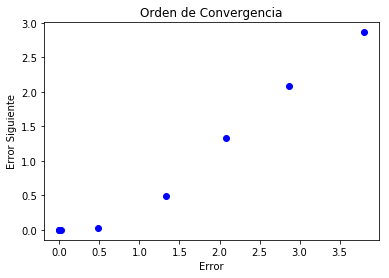

In [29]:
plt.plot(e_k, e_k_1, 'bo')
plt.title("Orden de Convergencia")
plt.xlabel("Error")
plt.ylabel("Error Siguiente")
plt.show()

In [34]:
# Efectuamos una regresión lineal en logaritmos
# para estimar la tasa de convergencia
modelo = LinearRegression()  
modelo.fit(np.log(e_k).reshape(-1, 1), 
           np.log(e_k_1).reshape(-1, 1))

# Obtenemos la tasa de convergencia y la constante
# a partir de los coeficientes del modelo
r = modelo.coef_
C = np.exp(modelo.intercept_)
print("Tasa de convergencia r=%0.2f con constante C=%0.2f" % (r, C))

Tasa de convergencia r=1.10 con constante C=0.15


***
## Ejercicio 3 - problema de optimización

In [36]:
# Minimizar 4x^4-4x+1
# Por lo tanto, queremos resolver 16x^3-4 = 0
# Utilizamos nuestra función de Newton:

tableOut, soluc = newtonSolverX(0.1, "16x^3-4", 1e-7)

Algoritmo terminado...


In [38]:
# Mostrar la tabla de resultados
print(tableOut)

    Iter        Xn         Error          F(x)        f'(x)
0      1  8.400000  3.984000e+00 -3.984000e+00     0.480000
1      2  5.601181  9.479264e+03  9.479264e+03  3386.879998
2      3  3.736777  2.807634e+03  2.807634e+03  1505.914986
3      4  2.497153  8.308558e+02  8.308558e+02   670.248068
4      5  1.678132  2.451467e+02  2.451467e+02   299.316995
5      6  1.148346  7.161334e+01  7.161334e+01   135.174114
6      7  0.828758  2.022917e+01  2.022917e+01    63.297552
7      8  0.673834  5.107575e+00  5.107575e+00    32.968290
8      9  0.632755  8.952906e-01  8.952906e-01    21.794499
9     10  0.629973  5.347024e-02  5.347024e-02    19.218194
10    11  0.629961  2.347681e-04  2.347681e-04    19.049558
11    12  0.629961  4.592716e-09  4.592716e-09    19.048813


In [39]:
# Mostrar la solución
print("Solución: ", soluc[1])

Solución:  0.6299605249474366


Esta solución corresponde a un mínimo global, porque la función $g$ es estrictamente convexa. Por lo tanto, al haber encontrado un punto estacionario en la función, tenemos las condiciones necesarias y suficientes para clasificar a este punto estacionario como un minimizador **global**.